# Fuzzy Matching

Last update 29.08.2023 Anna K

In [1]:
import pandas as pd

## Uploading the cleaned dataset

### Try 1

In [2]:
# Load your existing database into a DataFrame
data = pd.read_csv('from_yannik/data_clean_with_stopwords.csv') # insert path
# Notice the .copy() to copy the values 
data = data.copy()

In [3]:
data.reset_index()
data = data[["sender", "text", "date"]]

### Try 2

In [4]:
# Load your existing database into a DataFrame
data2 = pd.read_csv('from_yannik/data_handover_for_anna.csv') # insert path
# Notice the .copy() to copy the values 
data2 = data2.copy()

### Try 3

In [5]:
# Load your existing database into a DataFrame
data3 = pd.read_csv('from_yannik/data_handover_for_team.csv') # insert path
# Notice the .copy() to copy the values 
data3 = data3.copy()

## Preparation: Fuzzy Matching & Stations

In [6]:
!pip install thefuzz

In [7]:
from thefuzz import process
from thefuzz import fuzz

In [100]:
# Upload dataframe with station names
station_df = pd.read_csv('s_u_stations_fixed_with_keys.csv')
# Creating a list with station names
stations = list(station_df['keys'].values)

## Filters to identify station

In [9]:
def identify_station(some_string):
    res1 = None
    res2 = None
    if some_string[1][1] > 70:
        res1 = some_string[1][0]
        return some_string[0][0], some_string[1][0]
    elif some_string[0][1] > 70:
        return some_string[0][0]
    return None

In [338]:
def identify_station_precise(some_string, confidence_first=80, confidence_second=90):
    res1 = None
    res2 = None
    if some_string[1][1] > confidence_second:
        res1 = some_string[1][0]
        return some_string[0][0], some_string[1][0]
    elif some_string[0][1] > confidence_first: #try 79 or 89 and other, better less lines but better quality
        return some_string[0][0]
    return None

# Fuzz Try 1

In [11]:
station_entries = []
for entries in data["text"]:
    out = process.extract(entries, stations, limit=2)
    station_entries.append(out)

Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '?!']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '?']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: ',']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '.']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '?']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '!!!!!?']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '^^']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '??????????!!!!!!!!!!!!']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '/']
Applied processor reduces input query to empt

Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '?']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '.']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '/']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '???']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '?']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '/']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: ',']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '!!!!!!!!!!!!!']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '+ +']
Applied processor reduces input query to empty string, al

In [12]:
data['fuzz'] = station_entries

In [13]:
data['station'] = station_entries
data['station'] = data['station'].map(identify_station)

In [14]:
data.tail(20)

,sender,text,date,fuzz,station
147452,999215014.0,s41 tempelhof und s41 ostkreuz \nfett kontros ...,2020-11-07 14:56:05,"[(gesundbrunnen, 60), (ostkreuz, 60)]",None
147453,999365610.0,immer noch…,2023-03-24 12:45:03,"[(buch, 60), (messe nord/icc, 50)]",None
147454,999365610.0,"bvg fährt alles, nur s-bahn & co werden bestreikt",2023-03-27 09:27:54,"[(leinestr, 68), (gehrenseestr, 60)]",None
147455,999365610.0,"sind drin, hinteres ende des zuges. grade mehr...",2023-04-11 12:18:39,"[(mehringdamm, 90), (eichborndamm, 65)]",mehringdamm
147456,999365610.0,"nicht wirklich frei fahren relevant, aber viel...",2023-04-13 14:53:35,"[(mendelssohn bartholdy park, 86), (neukölln, ...",mendelssohn bartholdy park
147457,999365610.0,"2x ordnungsamt, vorderer teil des zuges am bun...",2023-05-17 09:43:12,"[(bundesplatz, 90), (hansaplatz, 63)]",bundesplatz
147458,999416326.0,u6 platz der luftbrücke,2023-07-05 17:13:00,"[(platz der luftbrücke, 95), (nauener platz, 86)]","(platz der luftbrücke, nauener platz)"
147459,999425588.0,hallo hätte jemand ein berlin ticket u vom ges...,2020-08-17 08:03:02,"[(karl bonhoeffer nervenklinik, 86), (karl mar...","(karl bonhoeffer nervenklinik, karl marx str)"
147460,999425588.0,yes got one yesterday at 13:30 would be lovely...,2020-08-17 08:20:29,"[(neu westend, 65), (konstanzer str, 51)]",None
147461,999425588.0,hallo hätte jemand ein berlin ticket u vom ges...,2020-08-17 10:48:37,"[(karl bonhoeffer nervenklinik, 86), (karl mar...",karl bonhoeffer nervenklinik


# Fuzz Try 2 (partial ratio, dataset not fully clean)

In [15]:
data2.reset_index()
data2 = data2[["sender", "text", "date"]]

In [16]:
data2.dropna(subset='text', inplace=True)

In [17]:
data2["text"] = data2["text"].str.strip()

In [18]:
data2["text"].duplicated().sum()

8358

In [19]:
data2 = data2.drop_duplicates(subset='text')

In [20]:
data2 = data2[data2["text"] != ""]

In [21]:
data2.dropna(subset='text', inplace=True)

In [22]:
station_entries2 = []
for entries in data2["text"]:
    out = process.extract(entries, stations, limit=2, scorer=fuzz.partial_ratio)
    station_entries2.append(out)

Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '̈']


In [23]:
data2['station'] = station_entries2
data2['station'] = data2['station'].map(identify_station)

In [24]:
data2['fuzz'] = station_entries2

In [26]:
data2.loc[147452, 'text']

's41 tempelhof s41 ostkreuz fett kontros bvg sicherheit eingestiegen  db sicherheit beides sicherheit kontros  deren umhängekarte gesehn rausholen gesundbrunnen 4 teams unterwegs team is storkower raus'

In [25]:
data2.tail(20)

,sender,text,date,station,fuzz
147449,999215014.0,hackeschee markt 3 menschen friedrichstraße s1...,2020-08-06 11:22:34,"(friedrichstr, hackescher markt)","[(friedrichstr, 100), (hackescher markt, 94)]"
147450,999215014.0,2 kontros u 6 kochstraße ausgestiegen 2 kontro...,2020-08-12 06:11:57,"(kochstr, tegel)","[(kochstr, 100), (tegel, 80)]"
147451,999215014.0,polizei rathaus steglitz 1 kontrolleur,2020-08-20 15:44:48,"(rathaus steglitz, tegel)","[(rathaus steglitz, 100), (tegel, 80)]"
147452,999215014.0,s41 tempelhof s41 ostkreuz fett kontros bvg si...,2020-11-07 14:56:05,"(gesundbrunnen, ostkreuz)","[(gesundbrunnen, 100), (ostkreuz, 100)]"
147453,999365610.0,immer noch…,2023-03-24 12:45:03,None,"[(buch, 67), (kochstr, 60)]"
147454,999365610.0,bvg fährt sbahn co bestreikt,2023-03-27 09:27:54,None,"[(oberspree, 67), (seestr, 67)]"
147455,999365610.0,drin hinteres ende zuges grade mehringdamm,2023-04-11 12:18:39,"(mehringdamm, eichborndamm)","[(mehringdamm, 100), (eichborndamm, 73)]"
147456,999365610.0,wirklich frei fahren relevant vielleicht trot...,2023-04-13 14:53:35,"(neukölln, tierpark)","[(neukölln, 100), (tierpark, 75)]"
147457,999365610.0,2x ordnungsamt vorderer teil zuges bundesplat...,2023-05-17 09:43:12,"(bundesplatz, bundestag)","[(bundesplatz, 100), (bundestag, 78)]"
147459,999425588.0,hallo hätte jemand berlin ticket u gestern 130...,2020-08-17 08:03:02,"(neukölln, karl marx str)","[(neukölln, 100), (karl marx str, 85)]"


### More precise mapping

In [27]:
data2['station'] = station_entries2
data2['station'] = data2['station'].map(identify_station_precise)

In [28]:
data2.tail(30)

,sender,text,date,station,fuzz
147439,999118258.0,u5 blauwesten hauptbanhof,2023-02-17 11:54:30,hauptbahnhof,"[(hauptbahnhof, 96), (westend, 86)]"
147440,999204625.0,s1 richtung wannsee 1 mann recht kräftig geb...,2020-07-15 16:42:15,"(potsdamer platz, wannsee)","[(potsdamer platz, 100), (wannsee, 100)]"
147441,999204625.0,s1 richtung oranienburg höhe friedrichstraße ...,2020-08-25 06:10:07,"(friedrichstr, oranienburg)","[(friedrichstr, 100), (oranienburg, 100)]"
147442,999204625.0,s1 nach wannsee höhe julius leber 2 frauen zug,2020-10-22 05:57:18,wannsee,"[(wannsee, 100), (julius leber brücke, 74)]"
147443,999204625.0,s1 friedrichstraße unteren bahnhof 3 männer ...,2020-12-22 10:21:47,friedrichstr,"[(friedrichstr, 100), (friedrichshagen, 80)]"
147444,999204625.0,2 ppl friedrichstraße 2nd one all black clothing,2021-02-25 09:24:20,friedrichstr,"[(friedrichstr, 100), (friedrichshagen, 80)]"
147445,999204625.0,2 männer frau kaiser wilhelm platz gerade beid...,2021-05-12 11:33:47,tegel,"[(tegel, 80), (tiergarten, 75)]"
147446,999204625.0,friedrichstraße direction west s5 direction ch...,2021-11-27 22:31:52,"(charlottenburg, friedrichstr)","[(charlottenburg, 100), (friedrichstr, 100)]"
147447,999204625.0,s1 at friedrichstraße direction north white bag,2021-12-08 07:40:29,friedrichstr,"[(friedrichstr, 100), (friedrichshagen, 80)]"
147448,999215014.0,s7 linie,2020-08-06 10:52:07,None,"[(unter den linden, 67), (altglienicke, 62)]"


In [29]:
data2.dropna(subset="station", inplace = True)

In [30]:
data2

,sender,text,date,station,fuzz
2,-1.001571e+12,kontis mehringdamm weiß nich schon sorry gle...,2022-03-03 16:41:36,"(mehringdamm, spandau)","[(mehringdamm, 100), (spandau, 100)]"
3,-1.001571e+12,kontis moritzplatz,2022-03-10 14:38:26,moritzplatz,"[(moritzplatz, 100), (hansaplatz, 67)]"
5,-1.001571e+12,2 kontis u7 nach spandau bei konstanter str au...,2022-06-12 12:33:58,"(spandau, konstanzer str)","[(spandau, 100), (konstanzer str, 93)]"
6,-1.001571e+12,bitte teilen please spread alerta antifascist...,2022-07-14 12:36:03,kottbusser tor,"[(kottbusser tor, 100), (bundestag, 78)]"
7,-1.001615e+12,großkontrolle u8 schönleibstraße neongelben sc...,2021-12-10 22:49:44,schönleinstr,"[(schönleinstr, 92), (leinestr, 75)]"
...,...,...,...,...,...
147466,9.995103e+08,2 guys 2 girls u5 weberwiese,2020-06-26 08:22:52,weberwiese,"[(weberwiese, 100), (westend, 67)]"
147467,9.996845e+08,u2 bei rosalixenburger platz 3 manner,2021-03-08 13:48:04,rosa luxemburg platz,"[(rosa luxemburg platz, 80), (nauener platz, 77)]"
147468,9.996845e+08,u5 weberwiese 34 manner,2021-03-08 14:52:48,weberwiese,"[(weberwiese, 100), (erkner, 67)]"
147469,9.996845e+08,u2 rosa luxemburg platz richtung alex,2021-04-20 11:53:17,"(alex, rosa luxemburg platz)","[(alex, 100), (rosa luxemburg platz, 100)]"


In [31]:
data2.to_csv("preliminary_output_witt_fuzz.csv")

# Fuzz Try 3

In [12]:
stations = list(station_df['keys'].values)
station_entries3 = []
for entries in data3["text"]:
    out = process.extract(entries, stations, limit=2, scorer=fuzz.partial_ratio)
    station_entries3.append(out)

Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '̈']


In [101]:
df_chat = data3[["date"]]
df_chat["station_key"] = station_entries3
df_chat["text"] = data3["text"]
df_chat["station_key"] = df_chat["station_key"].map(identify_station_precise)
df_chat.dropna(subset="station_key", inplace = True)

In [102]:
df_chat["station_key"] = station_entries3
df_chat["text"] = data3["text"]
df_chat["station_key"] = df_chat["station_key"].map(identify_station_precise)
df_chat.dropna(subset="station_key", inplace = True)

/var/folders/13/cyjcpcpx6zx62lkt8r16y6dh0000gn/T/ipykernel_10437/2517472734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chat["station_key"] = station_entries3
/var/folders/13/cyjcpcpx6zx62lkt8r16y6dh0000gn/T/ipykernel_10437/2517472734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chat["text"] = data3["text"]
/var/folders/13/cyjcpcpx6zx62lkt8r16y6dh0000gn/T/ipykernel_10437/2517472734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [43]:
#df_chat = df_chat.set_index("date") ### Don't do it yet, because the "date" will get lost in merging!
#df_chat = df_chat.drop(columns="index")

In [103]:
df_chat.tail(40)

,date,station_key,text
138691,2023-08-17 17:10:08,lichtenberg,s75 ostküste lichtinberg
138692,2023-08-17 17:24:54,görlitzer bahnhof,u3 görlitzer bahnhof bahnsteig 2 blauwestne
138693,2023-08-17 17:27:38,"(hermannstr, schönleinstr)",u8 schönleinstr 4x richtung hermannstrasse
138694,2023-08-17 17:31:05,wittenau,u8 kotti richtung wittenau
138700,2023-08-18 05:48:59,wuhletal,2 personen manl weibl s5 aktuell wuhletal
138701,2023-08-18 06:18:59,"(blissestr, rathaus spandau)",2 männer blaue u7 richtung rathaus spandau ...
138702,2023-08-18 07:04:24,frankfurter tor,m10 richtung warschauer gleich frankfurter to...
138703,2023-08-18 07:24:58,hauptbahnhof,m10 richtung hauptbahnhof gleich landsberger p...
138704,2023-08-18 07:25:20,greifswalder str,0924 uhr weitergeleitet s42 greifswalder st...
138705,2023-08-18 07:28:08,landsberger allee,s41 mannlich rote fussball tshirt weblich weis...


In [105]:
station_df

,Unnamed: 0,station name,lines,area,latitude,longitude,keys
0,0,Adenauerplatz,U7,Charlottenburg,52.499722,13.307222,adenauerplatz
1,1,Adlershof,"S45, S46, S8, S85, S9",Adlershof,52.434722,13.541389,adlershof
2,2,Afrikanische Straße,U6,Wedding,52.560556,13.334167,afrikanische str
3,3,Ahrensfelde,S7,Marzahn,52.571667,13.565000,ahrensfelde
4,4,Alexanderplatz,"U2, U5, U8, S3, S5, S7, S9",Mitte,52.521389,13.412639,alex
...,...,...,...,...,...,...,...
313,313,Zepernick,S2,Panketal,52.659722,13.533889,zepernick
314,314,Zeuthen,S46,Zeuthen,52.348611,13.627500,zeuthen
315,315,Zitadelle,U7,Haselhorst,52.537778,13.217778,zitadelle
316,316,Zoologischer Garten,"U2, U9, S3, S5, S7, S9",Charlottenburg,52.507222,13.332500,zoo


In [108]:
full_df = df_chat.merge(station_df, left_on="station_key", right_on="keys")

In [109]:
full_df = full_df.set_index("date")

In [118]:
full_df

,station_key,text,station name,lines,area,latitude,longitude
date,,,,,,,
2018-02-16 12:12:04,zoo,s3s5s7s9 berlin hbf kontrolleure weitergefah...,Zoologischer Garten,"U2, U9, S3, S5, S7, S9",Charlottenburg,52.507222,13.332500
2018-04-04 13:43:51,zoo,stadt linie s5 7 3 kontis mindestens drei stüc...,Zoologischer Garten,"U2, U9, S3, S5, S7, S9",Charlottenburg,52.507222,13.332500
2018-04-17 17:35:49,zoo,m46 richtung zoo,Zoologischer Garten,"U2, U9, S3, S5, S7, S9",Charlottenburg,52.507222,13.332500
2018-04-19 10:50:53,zoo,grosse kontrolle zoo u9,Zoologischer Garten,"U2, U9, S3, S5, S7, S9",Charlottenburg,52.507222,13.332500
2018-04-24 17:00:16,zoo,geht u9 zoo leo,Zoologischer Garten,"U2, U9, S3, S5, S7, S9",Charlottenburg,52.507222,13.332500
...,...,...,...,...,...,...,...
2023-02-16 14:46:05,wildau,s8 storkower richt wildau,Wildau,S46,Wildau,52.320000,13.633889
2023-03-06 12:10:58,wildau,s46 wildau richtung königwusterhausen 2 f zivil,Wildau,S46,Wildau,52.320000,13.633889
2023-03-08 09:33:14,wildau,2 kontrolleure s46 wildau,Wildau,S46,Wildau,52.320000,13.633889


In [111]:
full_df.drop(columns="Unnamed: 0", inplace=True)
full_df.drop(columns="keys", inplace=True)

In [119]:
full_df.sort_index(ascending=True)

,station_key,text,station name,lines,area,latitude,longitude
date,,,,,,,
2018-02-16 12:12:04,zoo,s3s5s7s9 berlin hbf kontrolleure weitergefah...,Zoologischer Garten,"U2, U9, S3, S5, S7, S9",Charlottenburg,52.507222,13.332500
2018-02-16 14:31:21,beusselstr,beusselstr s42 glaube beussel ausgestiegen,Beusselstraße,"S41, S42",Moabit,52.534444,13.329444
2018-02-16 17:08:17,karlshorst,s3 richtung karlshorst bzw bis karlshorst,Karlshorst,S3,Karlshorst,52.480833,13.525833
2018-02-16 20:55:56,gesundbrunnen,gesundbrunnen s42 zwei kontrolleure eingesti...,Gesundbrunnen,"U8, S1, S2, S25, S26, S41, S42",Gesundbrunnen,52.548611,13.381250
2018-02-19 10:12:01,landsberger allee,landsberger allee 3 kontrolettis schwarze mänt...,Landsberger Allee,"S41, S42, S8, S85",PrenzlauerBerg,52.529444,13.454722
...,...,...,...,...,...,...,...
2023-08-18 11:28:34,treptower park,s42 ringbahn treptower park 3 personen,Treptower Park,"S41, S42, S8, S85, S9",Alt-Treptow,52.493889,13.461389
2023-08-18 11:33:54,beusselstr,beusselstr rotes balenciaga,Beusselstraße,"S41, S42",Moabit,52.534444,13.329444
2023-08-18 11:48:39,eberswalder str,u2 eberswalder str bvg sicherheit polizei,Eberswalder Straße,U2,Prenzlauer Berg,52.541667,13.412222


## Preliminary Data Analysis

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, datetime, date, time, timezone
import datetime as dt

In [124]:
full_df

,station_key,text,station name,lines,area,latitude,longitude
date,,,,,,,
2018-02-16 12:12:04,zoo,s3s5s7s9 berlin hbf kontrolleure weitergefah...,Zoologischer Garten,"U2, U9, S3, S5, S7, S9",Charlottenburg,52.507222,13.332500
2018-02-16 14:31:21,beusselstr,beusselstr s42 glaube beussel ausgestiegen,Beusselstraße,"S41, S42",Moabit,52.534444,13.329444
2018-02-16 17:08:17,karlshorst,s3 richtung karlshorst bzw bis karlshorst,Karlshorst,S3,Karlshorst,52.480833,13.525833
2018-02-16 20:55:56,gesundbrunnen,gesundbrunnen s42 zwei kontrolleure eingesti...,Gesundbrunnen,"U8, S1, S2, S25, S26, S41, S42",Gesundbrunnen,52.548611,13.381250
2018-02-19 10:12:01,landsberger allee,landsberger allee 3 kontrolettis schwarze mänt...,Landsberger Allee,"S41, S42, S8, S85",PrenzlauerBerg,52.529444,13.454722
...,...,...,...,...,...,...,...
2023-08-18 11:28:34,treptower park,s42 ringbahn treptower park 3 personen,Treptower Park,"S41, S42, S8, S85, S9",Alt-Treptow,52.493889,13.461389
2023-08-18 11:33:54,beusselstr,beusselstr rotes balenciaga,Beusselstraße,"S41, S42",Moabit,52.534444,13.329444
2023-08-18 11:48:39,eberswalder str,u2 eberswalder str bvg sicherheit polizei,Eberswalder Straße,U2,Prenzlauer Berg,52.541667,13.412222


In [184]:
full_df["area"].value_counts()

Mitte                     12118
Neukölln                   6638
Kreuzberg                  5901
Friedrichshain             5369
Charlottenburg             3880
                          ...  
Borgsdorf                     2
Fredersdorf-Vogelsdorf        2
Blankenfelde-Mahl             1
Potsdam                       1
Lehnitz                       1
Name: area, Length: 94, dtype: int64

In [185]:
areas = full_df["area"].value_counts()

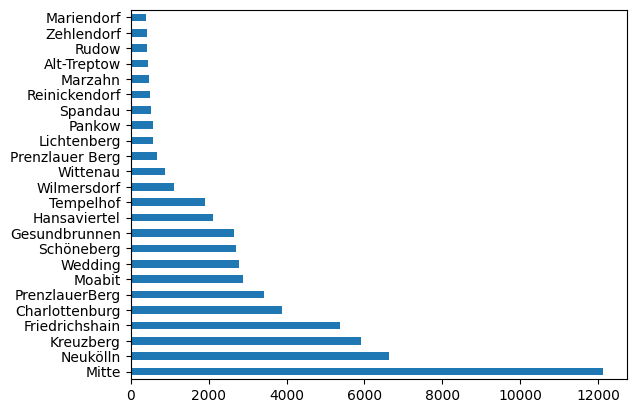

In [186]:
areas[areas > 300].plot(kind='barh' );

In [187]:
full_df["station name"].value_counts()

Alexanderplatz          3590
Hermannstraße           2385
Friedrichstraße         1853
Hermannplatz            1789
Tempelhof               1676
                        ... 
Lehnitz                    1
Potsdam Hauptbahnhof       1
Mahlow                     1
Zepernick                  1
Nürnberger Platz           1
Name: station name, Length: 306, dtype: int64

In [188]:
station = full_df["station name"].value_counts()

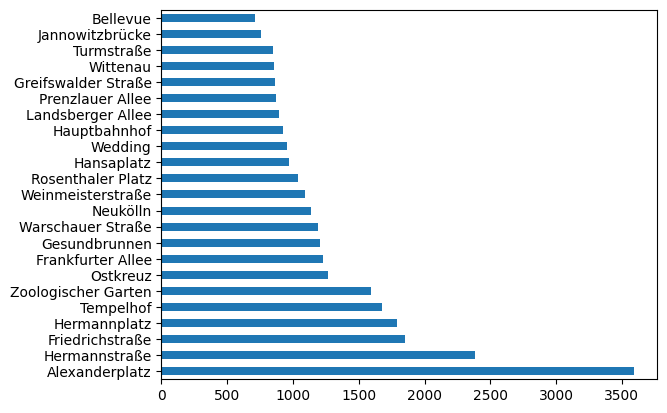

In [189]:
station[station > 700].plot(kind='barh');

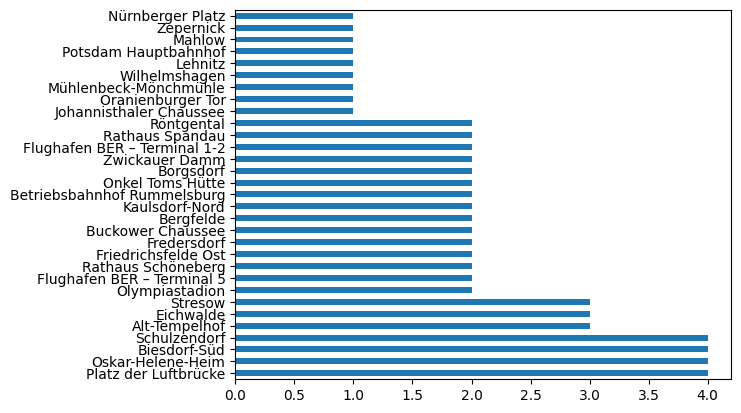

In [224]:
station[station < 5].plot(kind='barh');

In [190]:
full_df["lines"].value_counts()

U8                            5226
U2, U5, U8, S3, S5, S7, S9    3590
S41, S42, S8, S85             3320
U6                            3092
U7                            2677
                              ... 
S47                             21
U4                              17
U8, S25                          8
U5, U6                           5
S46, S8                          3
Name: lines, Length: 92, dtype: int64

In [214]:
lines_counts = []
for entries in full_df["lines"]:
    lines = entries.split(", ")
    for i in lines:
        lines_counts.append(i)

lines_counts = pd.DataFrame(lines_counts)
counts = lines_counts.value_counts()

In [215]:
lines_counts.value_counts()

S41    18531
S42    18531
U8     16977
S7     15219
S3     14794
S5     14523
S9     14164
U6      9405
U2      9205
U5      8775
S46     8546
S8      8122
S85     7978
U7      7890
U9      6894
S1      6823
S45     6463
S26     6350
S2      6271
S25     5827
U1      5447
S47     4014
S75     3641
U3       819
U4       310
dtype: int64

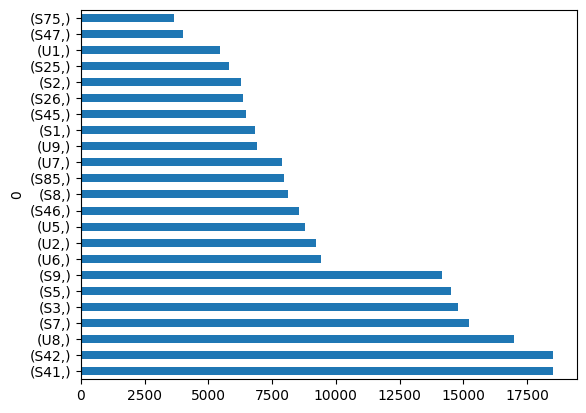

In [218]:
counts[counts > 1000].plot(kind='barh');

In [256]:
full_df["year"] = full_df.index
full_df["year"] = pd.to_datetime(full_df["year"])
full_df["year"] = full_df["year"].dt.year

In [271]:
full_df["month"] = full_df.index
full_df["month"] = pd.to_datetime(full_df["month"])
full_df["month"] = full_df["month"].dt.month
months = {
    1: "January", 2: "February", 3: "March", 
    4: "April", 5: "May", 6: "June", 7: "July", 
    8: "August", 9: "September", 10: "October", 
    11: "November", 12: "December"
}

full_df["month"] = full_df["month"].map(months)

In [272]:
full_df["weekday"] = full_df.index
full_df["weekday"] = pd.to_datetime(full_df["weekday"])
full_df["weekday"] = full_df["weekday"].dt.weekday
weekdays = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
full_df["weekday"] = full_df["weekday"].map(weekdays)


In [273]:
full_df["hour"] = full_df.index
full_df["hour"] = pd.to_datetime(full_df["hour"])
full_df["hour"] = full_df["hour"].dt.hour

In [274]:
full_df["weekday"].unique()

array(['Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday',
       'Sunday'], dtype=object)

In [279]:
full_df

,station_key,text,station name,lines,area,latitude,longitude,month,year,weekday,hour
date,,,,,,,,,,,
2018-02-16 12:12:04,zoo,s3s5s7s9 berlin hbf kontrolleure weitergefah...,Zoologischer Garten,"U2, U9, S3, S5, S7, S9",Charlottenburg,52.507222,13.332500,February,2018,Friday,12
2018-02-16 14:31:21,beusselstr,beusselstr s42 glaube beussel ausgestiegen,Beusselstraße,"S41, S42",Moabit,52.534444,13.329444,February,2018,Friday,14
2018-02-16 17:08:17,karlshorst,s3 richtung karlshorst bzw bis karlshorst,Karlshorst,S3,Karlshorst,52.480833,13.525833,February,2018,Friday,17
2018-02-16 20:55:56,gesundbrunnen,gesundbrunnen s42 zwei kontrolleure eingesti...,Gesundbrunnen,"U8, S1, S2, S25, S26, S41, S42",Gesundbrunnen,52.548611,13.381250,February,2018,Friday,20
2018-02-19 10:12:01,landsberger allee,landsberger allee 3 kontrolettis schwarze mänt...,Landsberger Allee,"S41, S42, S8, S85",PrenzlauerBerg,52.529444,13.454722,February,2018,Monday,10
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-18 11:28:34,treptower park,s42 ringbahn treptower park 3 personen,Treptower Park,"S41, S42, S8, S85, S9",Alt-Treptow,52.493889,13.461389,August,2023,Friday,11
2023-08-18 11:33:54,beusselstr,beusselstr rotes balenciaga,Beusselstraße,"S41, S42",Moabit,52.534444,13.329444,August,2023,Friday,11
2023-08-18 11:48:39,eberswalder str,u2 eberswalder str bvg sicherheit polizei,Eberswalder Straße,U2,Prenzlauer Berg,52.541667,13.412222,August,2023,Friday,11


In [283]:
full_df["year"].value_counts()

2021    15382
2020    13732
2022    11678
2019    10299
2023     9588
2018     4119
Name: year, dtype: int64

In [284]:
full_df["month"].value_counts()

May          6320
March        6306
February     6110
November     5926
January      5812
October      5492
June         5480
April        5004
July         4966
December     4746
September    4493
August       4143
Name: month, dtype: int64

In [285]:
full_df["weekday"].value_counts()

Tuesday      12233
Wednesday    12172
Thursday     12146
Monday       10409
Friday        9756
Sunday        4269
Saturday      3813
Name: weekday, dtype: int64

In [286]:
full_df["hour"].value_counts()

11    7375
12    6828
10    6233
9     5795
8     5741
13    5539
7     5000
14    4356
15    3551
16    3303
6     3030
17    2795
18    1668
5     1201
19     686
20     414
21     359
4      267
22     255
23     139
0       88
3       66
1       63
2       46
Name: hour, dtype: int64

In [294]:
def time_of_the_day(n):
    res = None
    if n <= 23 & n > 21:  
        res = 5
    elif n <= 21 & n > 18:
        res = 4
    elif n <= 18 & n > 15:
        res = 3 
    elif n <= 15 & n > 11:
        res = 2
    elif n <= 11 & n > 6:
        res = 1   
    elif n <= 6:
        res = 0
    return res

In [295]:
full_df["time_day"] = full_df["hour"].apply(time_of_the_day)

In [296]:
full_df

,station_key,text,station name,lines,area,latitude,longitude,month,year,weekday,hour,time_day
date,,,,,,,,,,,,
2018-02-16 12:12:04,zoo,s3s5s7s9 berlin hbf kontrolleure weitergefah...,Zoologischer Garten,"U2, U9, S3, S5, S7, S9",Charlottenburg,52.507222,13.332500,February,2018,Friday,12,2.0
2018-02-16 14:31:21,beusselstr,beusselstr s42 glaube beussel ausgestiegen,Beusselstraße,"S41, S42",Moabit,52.534444,13.329444,February,2018,Friday,14,2.0
2018-02-16 17:08:17,karlshorst,s3 richtung karlshorst bzw bis karlshorst,Karlshorst,S3,Karlshorst,52.480833,13.525833,February,2018,Friday,17,NaN
2018-02-16 20:55:56,gesundbrunnen,gesundbrunnen s42 zwei kontrolleure eingesti...,Gesundbrunnen,"U8, S1, S2, S25, S26, S41, S42",Gesundbrunnen,52.548611,13.381250,February,2018,Friday,20,4.0
2018-02-19 10:12:01,landsberger allee,landsberger allee 3 kontrolettis schwarze mänt...,Landsberger Allee,"S41, S42, S8, S85",PrenzlauerBerg,52.529444,13.454722,February,2018,Monday,10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-18 11:28:34,treptower park,s42 ringbahn treptower park 3 personen,Treptower Park,"S41, S42, S8, S85, S9",Alt-Treptow,52.493889,13.461389,August,2023,Friday,11,1.0
2023-08-18 11:33:54,beusselstr,beusselstr rotes balenciaga,Beusselstraße,"S41, S42",Moabit,52.534444,13.329444,August,2023,Friday,11,1.0
2023-08-18 11:48:39,eberswalder str,u2 eberswalder str bvg sicherheit polizei,Eberswalder Straße,U2,Prenzlauer Berg,52.541667,13.412222,August,2023,Friday,11,1.0


In [123]:
#full_df.to_csv("./test_data.csv")

In [ ]:
# Outline for Data analysis

# probability for monday
# probability for day of the week
# probability for time of the day
# probability for seasons
# most occuring stations > check with this for fuzzy match

# aggregate the time object > decompose and do aggregtions



In [225]:
# Flughafen needs different key

In [311]:
lines = pd.read_csv('from_yannik/stations_per_line.csv') # insert path
# Notice the .copy() to copy the values 
lines_un = list(lines['line'].unique())

In [319]:
list(lines[lines["line"]=="S1"]["station"])

['borgsdorf',
 'botanischer garten',
 'feuerbachstr',
 'friedenau',
 'frohnau',
 'hermsdorf',
 'julius leber brücke',
 'lehnitz',
 'lichterfelde west',
 'mexikoplatz',
 'oranienburg',
 'schlachtensee',
 'sundgauer str',
 'zehlendorf',
 'anhalter bahnhof',
 'humboldthain',
 'nordbahnhof',
 'oranienburger str',
 'bornholmer str',
 'schönholz',
 'wollankstr',
 'waidmannslust',
 'wilhelmsruh',
 'schöneberg',
 'nikolassee',
 'wannsee',
 'birkenwerder',
 'hohen neuendorf',
 'potsdamer platz',
 'brandenburger tor',
 'friedrichstr',
 'yorckstr',
 'gesundbrunnen',
 'wittenau',
 'rathaus steglitz']

In [322]:
data3.iloc[138649, 2]

'u8 moritzplatz richtung wittenau 3 blau vesten bos'

In [330]:
stations_full = list(station_df['keys'].values)

['kottbusser tor',
 'alex',
 'hermannplatz',
 'bernauer str',
 'boddinstr',
 'franz neumann platz',
 'heinrich heine str',
 'leinestr',
 'lindauer allee',
 'moritzplatz',
 'pankstr',
 'paracelsus bad',
 'rathaus reinickendorf',
 'residenzstr',
 'rosenthaler platz',
 'schönleinstr',
 'voltastr',
 'weinmeisterstr',
 'gesundbrunnen',
 'wittenau',
 'karl bonhoeffer nervenklinik',
 'jannowitzbrücke',
 'hermannstr',
 'osloer str']

In [335]:
lines['station'].unique()

array(['borgsdorf', 'botanischer garten', 'feuerbachstr', 'friedenau',
       'frohnau', 'hermsdorf', 'julius leber brücke', 'lehnitz',
       'lichterfelde west', 'mexikoplatz', 'oranienburg', 'schlachtensee',
       'sundgauer str', 'zehlendorf', 'anhalter bahnhof', 'humboldthain',
       'nordbahnhof', 'oranienburger str', 'bornholmer str', 'schönholz',
       'wollankstr', 'waidmannslust', 'wilhelmsruh', 'schöneberg',
       'nikolassee', 'wannsee', 'birkenwerder', 'hohen neuendorf',
       'attilastr', 'bernau', 'bernau friedenstal', 'blankenfelde',
       'buch', 'buckower chaussee', 'karow', 'lichtenrade', 'mahlow',
       'marienfelde', 'röntgental', 'schichauweg', 'zepernick',
       'priesterweg', 'südkreuz', 'blankenburg', 'pankow heinersdorf',
       'alt reinickendorf', 'eichborndamm', 'heiligensee', 'hennigsdorf',
       'lankwitz', 'osdorfer str', 'schulzendorf', 'tegel',
       'teltow stadt', 'lichterfelde ost', 'lichterfelde süd', 'südende',
       'betriebsbahnhof ru

In [344]:
for line in lines_un:
    print(list(lines[lines["line"]==line]["station"]))

['borgsdorf', 'botanischer garten', 'feuerbachstr', 'friedenau', 'frohnau', 'hermsdorf', 'julius leber brücke', 'lehnitz', 'lichterfelde west', 'mexikoplatz', 'oranienburg', 'schlachtensee', 'sundgauer str', 'zehlendorf', 'anhalter bahnhof', 'humboldthain', 'nordbahnhof', 'oranienburger str', 'bornholmer str', 'schönholz', 'wollankstr', 'waidmannslust', 'wilhelmsruh', 'schöneberg', 'nikolassee', 'wannsee', 'birkenwerder', 'hohen neuendorf', 'potsdamer platz', 'brandenburger tor', 'friedrichstr', 'yorckstr', 'gesundbrunnen', 'wittenau', 'rathaus steglitz']
['anhalter bahnhof', 'humboldthain', 'nordbahnhof', 'oranienburger str', 'bornholmer str', 'attilastr', 'bernau', 'bernau friedenstal', 'blankenfelde', 'buch', 'buckower chaussee', 'karow', 'lichtenrade', 'mahlow', 'marienfelde', 'röntgental', 'schichauweg', 'zepernick', 'priesterweg', 'südkreuz', 'blankenburg', 'pankow heinersdorf', 'potsdamer platz', 'pankow', 'brandenburger tor', 'friedrichstr', 'yorckstr', 'gesundbrunnen']
['anhal

In [348]:
station_df[station_df['station name'] == 'Mehringdamm']

,Unnamed: 0,station name,lines,area,latitude,longitude,keys
162,162,Mehringdamm,U6,Kreuzberg,52.494444,13.388611,mehringdamm


In [339]:
lines = pd.read_csv('from_yannik/stations_per_line.csv') # insert path
# Notice the .copy() to copy the values 
lines_un = list(lines['line'].unique())
stations_full = list(lines['station'].unique())

def station_finder(some_string):
    for line in lines_un:
        matches = re.search(r'{line}[^0-9]'.format(line=line.lower()), some_string)
        if matches is not None:
            stations = list(lines[lines["line"]==line]["station"])
            out = process.extract(some_string, stations, limit=2, scorer=fuzz.partial_ratio)
            return identify_station_precise(out, 70, 70)
    out = process.extract(some_string, stations_full, limit=2, scorer=fuzz.partial_ratio)
    return identify_station_precise(out)

In [340]:
data3["station_new"] = data3["text"].map(station_finder)

Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '̈']


In [341]:
data3.tail(30)

,Unnamed: 0,sender,text,date,station_new
138713,108005,6.151297e+07,u5 linden richtung hauptbahnhof blauweissen b...,2023-08-18 08:24:50,hauptbahnhof
138714,109850,6.261014e+07,u6 gerade platz luftbrücke 3x bos,2023-08-18 08:29:37,platz der luftbrücke
138715,36685,1.864743e+09,s41 richtung tempelhof poc normal angezogen,2023-08-18 08:30:19,tempelhof
138716,42571,2.059010e+08,3 menschen uniform bahnsteig mehringdamm u6 ri...,2023-08-18 08:42:45,"(kurt schumacher platz, mehringdamm)"
138717,1926,1.028576e+09,zwei kontrolletis s5 nach westkreuz gerade ne...,2023-08-18 08:51:48,"(westkreuz, mahlsdorf)"
138718,133958,8.467283e+08,u5 richtung kaulsdorf nord gerade weberwiese ...,2023-08-18 08:58:07,"(kaulsdorf nord, weberwiese)"
138719,146293,9.790446e+08,2 bos u7 parchimer allee,2023-08-18 08:58:24,parchimer allee
138720,110741,6.330336e+09,3 bos wittenberg platz u2,2023-08-18 09:15:01,wittenbergplatz
138721,92693,5.198245e+08,2 blue west kockstr,2023-08-18 09:17:13,kochstr
138722,131003,8.235120e+08,u5 2 blauesten grad magdalenenstr eingestiegen...,2023-08-18 09:23:15,magdalenenstr


In [342]:
df_chat = data3[["date"]]
df_chat["station_key"] = station_entries3
df_chat["text"] = data3["text"]
df_chat["station_key"] = df_chat["station_key"].map(identify_station_precise)
df_chat.dropna(subset="station_key", inplace = True)
df_chat["station_new"] = data3["station_new"]

/var/folders/13/cyjcpcpx6zx62lkt8r16y6dh0000gn/T/ipykernel_10437/1000607344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chat["station_key"] = station_entries3
/var/folders/13/cyjcpcpx6zx62lkt8r16y6dh0000gn/T/ipykernel_10437/1000607344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chat["text"] = data3["text"]
/var/folders/13/cyjcpcpx6zx62lkt8r16y6dh0000gn/T/ipykernel_10437/1000607344.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [343]:
df_chat.tail(40)

,date,station_key,text,station_new
138696,2023-08-17 17:54:46,heinrich heine str,u8 heinrich heine 2 kontis bos bahnsteig rich...,"(heinrich heine str, hermannstr)"
138700,2023-08-18 05:48:59,wuhletal,2 personen manl weibl s5 aktuell wuhletal,wuhletal
138701,2023-08-18 06:18:59,"(blissestr, rathaus spandau)",2 männer blaue u7 richtung rathaus spandau ...,"(blissestr, rathaus spandau)"
138702,2023-08-18 07:04:24,frankfurter tor,m10 richtung warschauer gleich frankfurter to...,frankfurter tor
138703,2023-08-18 07:24:58,hauptbahnhof,m10 richtung hauptbahnhof gleich landsberger p...,hauptbahnhof
138704,2023-08-18 07:25:20,greifswalder str,0924 uhr weitergeleitet s42 greifswalder st...,greifswalder str
138705,2023-08-18 07:28:08,landsberger allee,s41 mannlich rote fussball tshirt weblich weis...,landsberger allee
138706,2023-08-18 07:29:06,bernau,s2 bernau bhf zepernik 2 gelesene personen...,"(bernau, zepernick)"
138707,2023-08-18 07:32:32,prenzlauer allee,prenzlauer s42 steht draussen,prenzlauer allee
138708,2023-08-18 07:38:46,"(potsdamer platz, ruhleben)",potsdamer platz u2 richtung ruhleben blaue ...,"(ruhleben, potsdamer platz)"
